# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# First let's Import the required tools
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from IPython.display import Image
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
# Nnow let's download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Download image prediction file
# And save the downloaded file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_r = requests.get(url)

open('image_predictions.tsv', 'wb').write(image_r.content)

335079

In [5]:
# Let's read image predictions file into a dataframe
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
## I am still awaiting confirmation from Twitter for the activation of my developer account, 
## So I choose to use the alternative methode provided. 

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
consumer_key = '5jZGENTBCqsYm9QIEyi7aknoF'
consumer_secret = 'bqwnKc35QnmQY8G1hUUYxWIDqJ6fTPUh3uD59PprZe22Kc8cxY'
access_token = '545377105-RRXmTPfNkW1cApnIY6nSlEDQb89joeNB4eTqiZB4'
access_secret = 'cJVh3RZfSmuWo514G1syvOO8oy3EQrtdpzy396l96fDhA'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Will make sure the fetched Twitter archive is properly parsed in json we will add tweepy.parsers.JSONParser()
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# After making progress with my analysis, Twitter activated my dev account so I returned to make us of some part of the code
# Made modifications to it in a way I understand better

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
found_tweets = [] #Save found tweets
no_found_tweets = [] # Keep track of number of tweets not found

# This loop will likely take 20-30 minutes to run because of Twitter's rate limit
for tweet_id in df_twitter['tweet_id']:
    count += 1
    print(str(count) + ": " + str(tweet_id))
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        print("Success")
        found_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        print("Fail")
        no_found_tweets.append(tweet_id)
        fails_dict[tweet_id] = e
        pass

end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 7070

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 6668

In [8]:
# How many Tweets were found and how many tweets were not found
print("The list of tweets" ,len(found_tweets))
print("The list of tweets no found" , len(no_found_tweets))

The list of tweets 2327
The list of tweets no found 29


In [9]:
# Now we will read the result line by line and isolate each json record 
list_of_tweets = []
for json_tweet in found_tweets:
    list_of_tweets.append(json_tweet)

In [10]:
#Now we write the list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_tweets, indent=4))

In [11]:
## Read this tweet_json.txt file line by line into a pandas DataFrame 
# The way we read the tweet data made it much easy to read out the important data by referencing it as such ['name'] 

df_list = []
    
with open('tweet_json.txt', encoding='utf=8') as tweet_file:
#     # The file is structured as a json file so we will read is as so
    all_content = json.load(tweet_file)
    for each_content in all_content:
        tweet_id = each_content['id']
        whole_tweet = each_content['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_content['favorite_count']
        retweet_count = each_content['retweet_count']
        followers_count = each_content['user']['followers_count']
        friends_count = each_content['user']['friends_count']
        total_source = each_content['source']
        only_device = total_source[total_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_content['retweeted_status'] = each_content.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
        df_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        df_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])
        
        
    
    df_tweet

In [12]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
tweet_id            2327 non-null object
favorite_count      2327 non-null int64
retweet_count       2327 non-null int64
followers_count     2327 non-null int64
friends_count       2327 non-null int64
source              2327 non-null object
retweeted_status    2327 non-null object
url                 2327 non-null object
dtypes: int64(4), object(4)
memory usage: 145.5+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Before we begin outlining the issues we will first perform some accessment on the data.
We will use 2 types of assessment.

#### Visual assessment: 
each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. 

In [13]:
# Let's visualy access the 3 dataset provided 

In [14]:
# twitter_archive_enhanced.csv file
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Issues noticed with the twitter_archive_enhanced dataset 
<ul>
    <li>Dog names here aren't consistent with dogs, some names have 'none', 'a', or 'an'</li>
    <li>The Dataset includes retweet</li>
</ul

In [15]:
# image_predictions.tsv
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Issues noticed with the image_predictions dataset 
<ul>
    <li>In p1, p2, and p3 columns records with multiple words are separated with underscores   </li>
</ul

In [16]:
# tweet_json.txt
df_tweet

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,33800,7002,9300775,21,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29312,5298,9300775,21,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22040,3477,9300775,21,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,36920,7222,9300775,21,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35297,7754,9300775,21,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,17800,2599,9300775,21,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10360,1660,9300776,21,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,56835,15748,9300776,21,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,24508,3617,9300776,21,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,27948,6094,9300776,21,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


Let's take a look at rating numerators the denominators

#### Programmatic assessment: 
pandas' functions and/or methods are used to assess the data.

In [17]:
# twitter_archive_enhanced.csv file
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Issues noticed with the twitter_archive_enhanced dataset 
<ul>
    <li>in_reply_to_status_id column practically has no data as there are only 78 records out of 2355 rows</li>
    <li>in_reply_to_user_id column practically has no data as there are only 78 records out of 2355 rows</li>
    <li>retweeted_status_id column has only 181 record and 2,175 missing data, same as retweeted_status_user_id and retweeted_status_timestamp columns</li>
    <li>expanded_urls column has only a few missing data, we can make do with that.</li>
</ul

In [18]:
# image_predictions.tsv
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Issues noticed with the image_predictions dataset 
<ul>
    <li>Looking at this dataset no issues has been noticed yet, we will most likely notice a few issues at the visual assessment section</li>
</ul

In [19]:
# tweet_json.txt
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
tweet_id            2327 non-null object
favorite_count      2327 non-null int64
retweet_count       2327 non-null int64
followers_count     2327 non-null int64
friends_count       2327 non-null int64
source              2327 non-null object
retweeted_status    2327 non-null object
url                 2327 non-null object
dtypes: int64(4), object(4)
memory usage: 145.5+ KB


Issues noticed with the tweet_json dataset 
<ul>
    <li>Looking at this dataset no issues has been noticed yet, we will most likely notice a few issues at the visual assessment section</li>
</ul

#### Twitter Archive Dataframe Analysis

In [20]:
# twitter_archive_enhanced.csv file
df_twitter.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,None,None,None,None
2281,667369227918143488,NaN,NaN,2015-11-19 15:49:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a neat pup. Very white. Cool shad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667369227...,10,10,None,None,None,None,None
1921,674262580978937856,NaN,NaN,2015-12-08 16:21:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's super stoked about being an ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674262580...,9,10,Gus,None,None,pupper,None
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a frustrated pupper attempting to escap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933...,12,10,None,None,None,pupper,None
187,856282028240666624,NaN,NaN,2017-04-23 23:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Cermet, Paesh, and Morple. They are ab...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856282028...,14,10,Cermet,None,None,None,None
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None
857,763956972077010945,7.638652e+17,15846407.0,2016-08-12 04:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@TheEllenShow I'm not sure if you know this bu...,NaN,NaN,NaN,NaN,12,10,None,doggo,None,None,None
1971,673270968295534593,NaN,NaN,2015-12-05 22:41:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mac. His dad's probably a lawyer. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673270968...,11,10,Mac,None,None,None,None
716,783821107061198850,NaN,NaN,2016-10-06 00:08:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mairi. She has mastered the art of cam...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783821107...,12,10,Mairi,None,None,None,None
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None


The columns name, doggo, floofer, pupper, and puppo all seem to belong to the same variable or serve the same purpose

In [21]:
# twitter_archive_enhanced.csv file
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
# twitter_archive_enhanced.csv file
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


it's weird that rating numerators are greater than the denominators, but since we don't need to clean it, we might as well just ignore.

In [24]:
df_twitter['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Buddy           7
Toby            7
an              7
Daisy           7
Bailey          7
Jax             6
Jack            6
Scout           6
Bella           6
Leo             6
Oscar           6
Dave            6
Stanley         6
Rusty           6
Milo            6
Koda            6
Chester         5
             ... 
Kathmandu       1
Trip            1
Roscoe          1
Sweet           1
General         1
Beckham         1
Lambeau         1
Pilot           1
Eazy            1
Glacier         1
Malikai         1
Bones           1
Tuco            1
Dutch           1
Rhino           1
Gòrdón          1
Kuyu            1
Bradlay         1
officially      1
Arya            1
Gustaf          1
Sojourner       1
Philippe        1
Jeremy          1
Glenn     

#### Image Dataframe Analysis

In [25]:
# lets take a closer look at image_predictions.tsv
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
# Curiouse to see if any of the images loads up, let's try loading one up
# Reference: https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook

Image(url = 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')

In [27]:
# Let's check unique values in columns p1, p2, p3

In [28]:
# p1
df_image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [29]:
# p2
df_image_predictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
Samoyed                            20
toy_terrier                        20
chow                               20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [30]:
# p3
df_image_predictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

Issues noticed in all 3 columns p1, p2, p3
<ul>
    <li>
        Inconsistency with capitalisations, some words are sentence cases, while some start with capital letters, and others are all small cases
    </li>
    <li>Multiple words are separated with underscores</li>
    <li>Invalid data are present. I don't think I have seen a Dog as Jeep or a crayfish</li>
</ul

#### Twitter Count Dataframe Analysis

In [31]:
# tweet_json.txt
df_tweet.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,33800,7002,9300775,21,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29312,5298,9300775,21,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22040,3477,9300775,21,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,36920,7222,9300775,21,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35297,7754,9300775,21,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [32]:
# tweet_json.txt
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
tweet_id            2327 non-null object
favorite_count      2327 non-null int64
retweet_count       2327 non-null int64
followers_count     2327 non-null int64
friends_count       2327 non-null int64
source              2327 non-null object
retweeted_status    2327 non-null object
url                 2327 non-null object
dtypes: int64(4), object(4)
memory usage: 145.5+ KB


In [33]:
# tweet_json.txt
df_tweet.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2327.000000,2327.000000,2.327000e+03,2327.0
mean,7050.768801,2469.209282,9.300806e+06,21.0
std,10956.965170,4181.850724,6.588240e+01,0.0
min,0.000000,1.000000,9.300775e+06,21.0
25%,1224.500000,493.500000,9.300788e+06,21.0
50%,3049.000000,1148.000000,9.300800e+06,21.0
75%,8600.000000,2859.500000,9.300805e+06,21.0
max,144799.000000,70676.000000,9.301296e+06,21.0


### Quality issues
1. Dog names here aren't consistent with dogs, some names have 'none', 'a', or 'an'

2. p1, p2 and p3 columns have invalid data. I don't think I have seen a Dog as Jeep or a crayfish

3. The Dataset includes retweet

4. In p1, p2, and p3 columns records with multiple words are separated with underscores

5. Inconsistency with capitalisations, some words are sentence cases, while some start with capital letters, and others are all small cases

6. Invalid datatypes, especially tweet_id

7. The Source column still has the HTML tags
 
8. missing data in in_reply_to_status_id, in_reply_to_user_id,  and retweeted_status_id columns

### Tidiness issues
1. All 3 datasets are interconnected

2. The columns name, doggo, floofer, pupper, and puppo all seem to belong to the same variable or serve the same purpose

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [34]:
# Make copies of original pieces of data
df_twitter_copy = df_twitter.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_tweet_copy = df_tweet.copy()

### Issue #1:

#### Define:
Merge all 3 datasets are interconnected to get a high-quality and tidy master pandas DataFrame


#### Code

In [35]:
#Reference https://www.statology.org/pandas-merge-multiple-dataframes/ & https://pandas.pydata.org/docs/reference/api/pandas.concat.html
df_merged =  pd.concat([df_twitter_copy, df_image_predictions_copy, df_tweet_copy], join='inner', axis=1)

#### Test

In [36]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.061428,True,892420643555336193,33800,7002,9300775,21,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.072010,True,892177421306343426,29312,5298,9300775,21,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.116197,True,891815181378084864,22040,3477,9300775,21,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.222752,True,891689557279858688,36920,7222,9300775,21,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.154629,True,891327558926688256,35297,7754,9300775,21,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [37]:
df_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'favorite_count', 'retweet_count', 'followers_count', 'friends_count',
       'source', 'retweeted_status', 'url'],
      dtype='object')

In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 37 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2019 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
tweet_id                      20

### Issue #2:

#### Define
Combine the stages doggo, floofer, pupper, and puppo into one dog_stage column

#### Code

In [39]:
df_merged.loc[(df_twitter[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,...,0.082530,True,854010172552949760,14841,2791,9300776,21,Twitter for iPhone,Original tweet,https://t.co/Z1kG7DmW0Z
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,0.103792,True,852226086759018497,18362,6098,9300776,21,Twitter Web Client,Original tweet,https://t.co/RM95BluXh5
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,0.063786,True,815966073409433600,21123,7861,9300788,21,Twitter for iPhone,Original tweet,https://t.co/MiMKtsLN6k
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,...,0.013263,True,804738756058218496,12983,3601,9300788,21,Twitter for iPhone,Original tweet,https://t.co/kQVQoOW9NZ
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,...,0.017107,True,800018252395122689,26895,12314,9300788,21,Twitter for iPhone,Original tweet,https://t.co/gQqRBfkX4I
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,...,0.093392,False,798701998996647937,0,7245,9300788,21,Twitter for iPhone,This is a retweet,This is a retweet
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,...,0.065175,True,782722598790725632,16297,5012,9300788,21,Twitter for iPhone,Original tweet,https://t.co/zrMVdfFej6
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,...,0.063880,False,778764940568104960,819,338,9300788,21,Twitter for iPhone,Original tweet,https://t.co/tird9cIlzB
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,...,0.104939,True,772615324260794368,0,3118,9300788,21,Twitter for iPhone,This is a retweet,This is a retweet
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,...,0.047470,True,766078092750233600,0,2421,9300788,21,Twitter for iPhone,This is a retweet,This is a retweet


In [40]:
# We will extract words from the text column into a new dog_type colunn
# Reference: https://stackoverflow.com/questions/33408403/extracting-text-from-elements-in-pandas-column-writing-to-new-column
# df_merged['dog_stage'] = df_merged['text'].str.extract('(doggo|floofer|pupper|puppo)')
# df_merged[['dog_stage', 'doggo', 'floofer', 'pupper', 'puppo']].sample(15)

In [41]:
# Code suggested by the reviewer 
# it's noticed in the data that some tweet texts have multiple dog stages in a single tweet and our previous attempt didn't do justice to that
# merge different dog types into a column dog_class
df_merged['dog_stage'] = df_merged[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
df_merged['dog_stage'] = df_merged['dog_stage'].str.replace(r'(None,)', repl='')

#### Test

In [42]:
df_merged['dog_stage'].sample(20)

1004            None
1321     pupper,None
1612            None
1827            None
837             None
836             None
1111            None
1972            None
1608     pupper,None
896             None
1758            None
115             None
489            doggo
14        puppo,None
349             None
1091    floofer,None
1279     pupper,None
687             None
1030           doggo
652             None
Name: dog_stage, dtype: object

In [43]:
df_merged.drop(['puppo','pupper','floofer','doggo'], axis=1,  inplace=True)

In [44]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_dog,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,892420643555336193,33800,7002,9300775,21,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,892177421306343426,29312,5298,9300775,21,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,891815181378084864,22040,3477,9300775,21,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,891689557279858688,36920,7222,9300775,21,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,891327558926688256,35297,7754,9300775,21,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3,None


In [45]:
df_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'tweet_id', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'tweet_id', 'favorite_count', 'retweet_count',
       'followers_count', 'friends_count', 'source', 'retweeted_status', 'url',
       'dog_stage'],
      dtype='object')

In [46]:
df_merged.dog_stage.value_counts()

None             1695
pupper,None       245
doggo              83
puppo,None         29
pupper,doggo       12
floofer,None        9
puppo,doggo         1
floofer,doggo       1
Name: dog_stage, dtype: int64

### Issue #3:

#### Define
Dataset includes retweets, which are not needed, we will be removing retweets.

#### Code

In [47]:
# There are retweeted rows (about 179), we will check using retweeted_status_id column value to find retweets and remove them
df_merged = df_merged[np.isnan(df_merged.retweeted_status_id)]

In [48]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3_dog,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,892420643555336193,33800,7002,9300775,21,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,892177421306343426,29312,5298,9300775,21,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,891815181378084864,22040,3477,9300775,21,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,891689557279858688,36920,7222,9300775,21,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,891327558926688256,35297,7754,9300775,21,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3,None


There are retweeted rows has been removed

In [49]:
# We will remove the following columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
df_merged.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1,  inplace=True)

#### Test

In [50]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 31 columns):
tweet_id                 1896 non-null int64
in_reply_to_status_id    74 non-null float64
in_reply_to_user_id      74 non-null float64
timestamp                1896 non-null object
source                   1896 non-null object
text                     1896 non-null object
expanded_urls            1841 non-null object
rating_numerator         1896 non-null int64
rating_denominator       1896 non-null int64
name                     1896 non-null object
tweet_id                 1896 non-null int64
jpg_url                  1896 non-null object
img_num                  1896 non-null int64
p1                       1896 non-null object
p1_conf                  1896 non-null float64
p1_dog                   1896 non-null bool
p2                       1896 non-null object
p2_conf                  1896 non-null float64
p2_dog                   1896 non-null bool
p3                       189

### Issue #4:

#### Define
Check for duplicated columns and remove them

#### Code

In [51]:
# Let's check for dubplicated columns
df_merged.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False], dtype=bool)

Here we see that 'source' and 'tweet_id' columns are duplicated

In [52]:
# Let's remove duplicated columns
# Reference: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns

df_merged = df_merged.loc[:,~df_merged.columns.duplicated()]

#### Test

In [53]:
df_merged.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

No more duplicated columns

### Issue #5:

#### Define
Let's remove columns no longer needed for the purpose of our analysis

#### Code

In [54]:
# Let's drop columns: in_reply_to_status_id, in_reply_to_user_id, img_num, friends_count, followers_count,
df_merged.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'img_num', 'friends_count', 'followers_count', 'retweeted_status'], axis = 1, inplace = True)

#### Test

In [55]:
df_merged.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count', 'url', 'dog_stage'],
      dtype='object')

In [56]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null object
source                1896 non-null object
text                  1896 non-null object
expanded_urls         1841 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null bool
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null bool
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null bool
favorite_count        1896 non-null int64
retweet_count         1896 non-null int64
url                   1896 non-null objec

### Issue #6:

#### Define
Let's create a standard rating system, will create a new rating column to store the new rating gotten from the denominator and numerator

#### Code

In [57]:
df_merged['rating'] = (df_merged['rating_numerator']/df_merged['rating_denominator'])

#### Test

In [58]:
df_merged.rating.sample(10)

854     1.0
1849    1.1
1556    0.9
288     1.3
158     1.2
787     1.0
2011    1.2
154     1.3
1330    1.1
1853    1.0
Name: rating, dtype: float64

In [59]:
df_merged.rating.head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

In [60]:
df_merged.rating_numerator.sample(5)

931     10
1908     9
1177    12
1557    12
864     12
Name: rating_numerator, dtype: int64

In [61]:
df_merged.rating_denominator.sample(10)

173     10
580     10
1973    10
734     10
1055    10
786     10
77      10
1945    10
960     10
622     10
Name: rating_denominator, dtype: int64

### Issue #7:

#### Define
Fix Timestamps to datetime format, first remove the time zone 

In [62]:
df_merged['timestamp'].sample(20)

1586    2016-01-12 04:01:58 +0000
609     2016-11-12 21:02:38 +0000
1444    2016-02-08 15:14:57 +0000
440     2017-01-13 15:08:56 +0000
1615    2016-01-08 01:16:17 +0000
442     2017-01-12 16:54:26 +0000
640     2016-11-01 00:00:38 +0000
1781    2015-12-18 03:54:25 +0000
199     2017-04-17 23:52:16 +0000
1370    2016-02-24 02:36:23 +0000
843     2016-08-19 19:14:16 +0000
1226    2016-03-27 02:43:58 +0000
66      2017-06-26 19:07:24 +0000
129     2017-05-24 16:44:18 +0000
314     2017-02-24 17:01:22 +0000
349     2017-02-14 23:43:18 +0000
50      2017-07-05 15:48:34 +0000
1612    2016-01-08 04:46:13 +0000
657     2016-10-27 22:53:48 +0000
1088    2016-06-01 02:00:04 +0000
Name: timestamp, dtype: object

#### Code

In [63]:
#Remove time zone from the 'timestamp' column
df_merged['timestamp'] = df_merged['timestamp'].str.slice(start=0, stop=-6)

In [64]:
# timestamp dtype is string, will need to first convert it to Datetime dtype format 
# Reference: https://stackoverflow.com/questions/71469142/pandas-to-datetime-transformation-format-with-dots & https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df_merged.timestamp = pd.to_datetime(df_merged['timestamp'], format = '%Y-%m-%d %H:%M:%S.%f')

#### Test

In [65]:
df_merged['timestamp'].sample(20)

922    2016-07-21 23:53:04
632    2016-11-02 23:45:19
977    2016-07-04 17:00:26
998    2016-06-30 00:09:04
1654   2016-01-03 00:47:59
1264   2016-03-16 01:46:45
1604   2016-01-09 19:31:20
879    2016-08-03 00:59:13
1482   2016-01-30 02:58:42
1021   2016-06-25 15:29:00
974    2016-07-04 20:00:23
1448   2016-02-07 18:51:43
57     2017-07-01 21:49:04
1575   2016-01-14 03:28:06
786    2016-09-10 23:54:11
2009   2015-12-03 03:21:00
1408   2016-02-15 03:27:04
1304   2016-03-09 03:45:22
1844   2015-12-13 01:25:37
99     2017-06-09 00:02:31
Name: timestamp, dtype: datetime64[ns]

### Issue #8:

#### Define
Dog names here aren't consistent with dogs, some names have 'none', 'a', or 'an'
We will correct the naming issues with str.replace

#### Code

In [66]:
# Correct the naming issues with str.replace
df_merged.name = df_merged.name.str.replace('^[a-z]+', 'None')

#### Test

In [67]:
df_merged['name'].value_counts()

None        655
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Sadie         8
Penny         8
Lola          8
Tucker        8
Winston       7
Toby          7
Oscar         6
Daisy         6
Bella         6
Bailey        6
Stanley       6
Jax           6
Bo            6
Bentley       5
Buddy         5
Leo           5
Louis         5
Milo          5
Koda          5
Winnie        4
Sammy         4
Reggie        4
Cassie        4
Duke          4
Jack          4
           ... 
Cora          1
Napolean      1
Mya           1
Aubie         1
Crimson       1
Dietrich      1
Jerome        1
Bodie         1
Marq          1
Margo         1
Spencer       1
Pepper        1
Mitch         1
Daniel        1
Duchess       1
Devón         1
Sweets        1
Arlo          1
Dawn          1
Smiley        1
Callie        1
Combo         1
Zoe           1
Sparky        1
Claude        1
Jazzy         1
Timber        1
Harlso        1
Henry         1
Carbon        1
Name: name, Length: 831,

### Issue #9:

#### Define
Fix In p1, p2, and p3 columns records/words separated with underscores using str.replace

#### Code

In [68]:
# Remove underscores
df_merged.p1 = df_merged.p1.str.replace('_', ' ')
df_merged.p2 = df_merged.p1.str.replace('_', ' ')
df_merged.p3 = df_merged.p1.str.replace('_', ' ')

#### Test

In [69]:
df_merged[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
1847,web site,web site,web site
1224,toy poodle,toy poodle,toy poodle
440,Brabancon griffon,Brabancon griffon,Brabancon griffon
49,Airedale,Airedale,Airedale
668,boxer,boxer,boxer
1785,Staffordshire bullterrier,Staffordshire bullterrier,Staffordshire bullterrier
1864,Chihuahua,Chihuahua,Chihuahua
210,piggy bank,piggy bank,piggy bank
374,French bulldog,French bulldog,French bulldog
8,shopping cart,shopping cart,shopping cart


### Issue #10:

#### Define
Let's fix Inconsistency with capitalisations, some words are sentence cases, while some start with capital letters, and others are all small cases.

All words should be sentence case

#### Code

In [70]:
# Make all words in p1,p2,p3 and name sentence case using str.capitalize
df_merged.p1 = df_merged.p1.str.capitalize()
df_merged.p2 = df_merged.p1.str.capitalize()
df_merged.p3 = df_merged.p1.str.capitalize()
df_merged.p3 = df_merged.p1.str.capitalize()

#### Test

In [71]:
df_merged[['p1', 'p2', 'p3', 'name']].sample(20)

,p1,p2,p3,name
1173,Cliff,Cliff,Cliff,Derek
1137,Maltese dog,Maltese dog,Maltese dog,Raymond
105,Malamute,Malamute,Malamute,Kody
1906,Barbell,Barbell,Barbell,Louis
1763,French bulldog,French bulldog,French bulldog,None
549,Staffordshire bullterrier,Staffordshire bullterrier,Staffordshire bullterrier,Shooter
210,Piggy bank,Piggy bank,Piggy bank,Sailor
974,Wild boar,Wild boar,Wild boar,Jameson
419,Eskimo dog,Eskimo dog,Eskimo dog,None
305,Pomeranian,Pomeranian,Pomeranian,Lucy


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
df_merged.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In this section we will be:

1. Analyzing tweets history and the number of twets over time
2. Analyzing the retweet counts, and favorite counts comparison over time.
3. Analyzing the most popular dog names

#### 1. Analyzing the total number of tweets over time.

In [73]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null datetime64[ns]
source                1896 non-null object
text                  1896 non-null object
expanded_urls         1841 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null bool
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null bool
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null bool
favorite_count        1896 non-null int64
retweet_count         1896 non-null int64
url                   1896 non-nu

In [74]:
# Let's get tweet history distribution over years
# Reference: https://www.tutorialspoint.com/python-how-to-group-pandas-dataframe-by-days

tweets_history_years = df_merged.groupby(pd.Grouper(key = 'timestamp', freq = "Y")).count().reset_index()
tweets_history_years = tweets_history_years[['timestamp', 'tweet_id']]

In [75]:
tweets_history_years

,timestamp,tweet_id
0,2015-12-31,409
1,2016-12-31,1088
2,2017-12-31,399


In [76]:
tweets_history_years.sum()

tweet_id    1896
dtype: int64

In [77]:
tweets_history_years.max()

timestamp    2017-12-31 00:00:00
tweet_id                    1088
dtype: object

In [78]:
# Let's get tweet history distribution over Months
# Reference: https://www.tutorialspoint.com/python-how-to-group-pandas-dataframe-by-days

tweets_history_months = df_merged.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
tweets_history_months = tweets_history_months[['timestamp', 'tweet_id']]

In [79]:
tweets_history_months

,timestamp,tweet_id
0,2015-11-30,21
1,2015-12-31,388
2,2016-01-31,194
3,2016-02-29,125
4,2016-03-31,136
5,2016-04-30,60
6,2016-05-31,60
7,2016-06-30,94
8,2016-07-31,97
9,2016-08-31,63


In [80]:
tweets_history_months.max()

timestamp    2017-08-31 00:00:00
tweet_id                     388
dtype: object

In [81]:
tweets_history_months.count()

timestamp    22
tweet_id     22
dtype: int64

In [82]:
# Let's get tweet history distribution over Days
# Reference: https://www.tutorialspoint.com/python-how-to-group-pandas-dataframe-by-days

tweets_history_days = df_merged.groupby(pd.Grouper(key = 'timestamp', freq = "D")).count().reset_index()
tweets_history_days = tweets_history_days[['timestamp', 'tweet_id']]

In [83]:
tweets_history_days.head()

,timestamp,tweet_id
0,2015-11-29,4
1,2015-11-30,17
2,2015-12-01,24
3,2015-12-02,14
4,2015-12-03,18


In [84]:
tweets_history_days.count()

timestamp    612
tweet_id     612
dtype: int64

In [85]:
tweets_history_days.max()

timestamp    2017-08-01 00:00:00
tweet_id                      24
dtype: object

In [86]:
tweets_history_days.min()

timestamp    2015-11-29 00:00:00
tweet_id                       0
dtype: object

#### Analyzing the retweet counts, and favorite counts comparison over time.

In [87]:
retweet_count = df_merged.groupby('retweet_count')
retweet_count = retweet_count[['tweet_id']]

In [88]:
retweet_count.count().sample(20)

,tweet_id
retweet_count,
782,1
1338,3
536,1
2591,1
1589,1
1095,1
7054,1
170,1
224,1


In [89]:
favorite_count = df_merged.groupby('favorite_count')
favorite_count = favorite_count[['tweet_id']]

In [90]:
favorite_count.count().sample(20)

,tweet_id
favorite_count,
2968,1
2604,1
1999,2
5399,1
7957,1
4453,1
24373,1
2260,2
5997,1


#### Analyzing the most popular dog names

In [91]:
df_merged.name.value_counts()

None        655
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Sadie         8
Penny         8
Lola          8
Tucker        8
Winston       7
Toby          7
Oscar         6
Daisy         6
Bella         6
Bailey        6
Stanley       6
Jax           6
Bo            6
Bentley       5
Buddy         5
Leo           5
Louis         5
Milo          5
Koda          5
Winnie        4
Sammy         4
Reggie        4
Cassie        4
Duke          4
Jack          4
           ... 
Cora          1
Napolean      1
Mya           1
Aubie         1
Crimson       1
Dietrich      1
Jerome        1
Bodie         1
Marq          1
Margo         1
Spencer       1
Pepper        1
Mitch         1
Daniel        1
Duchess       1
Devón         1
Sweets        1
Arlo          1
Dawn          1
Smiley        1
Callie        1
Combo         1
Zoe           1
Sparky        1
Claude        1
Jazzy         1
Timber        1
Harlso        1
Henry         1
Carbon        1
Name: name, Length: 831,

### Insights:
1. 2016 had the highest tweet activity

2. December 2015 had the highest tweet activity 

3. The top 3 most popular dog names are Lucy, Charlie, and Oliver

### Visualization

In this section we will be:

1. Visualizing tweets history and the number of twets over time.
2. Visualizing the retweet counts, and favorite counts comparison over time.
3. Visualizing the most popular dog names

#### Visualizing tweets history and the number of twets over time.

In [92]:
start_date = tweets_history_years.max()[['timestamp']]
start_date

timestamp    2017-12-31 00:00:00
dtype: object

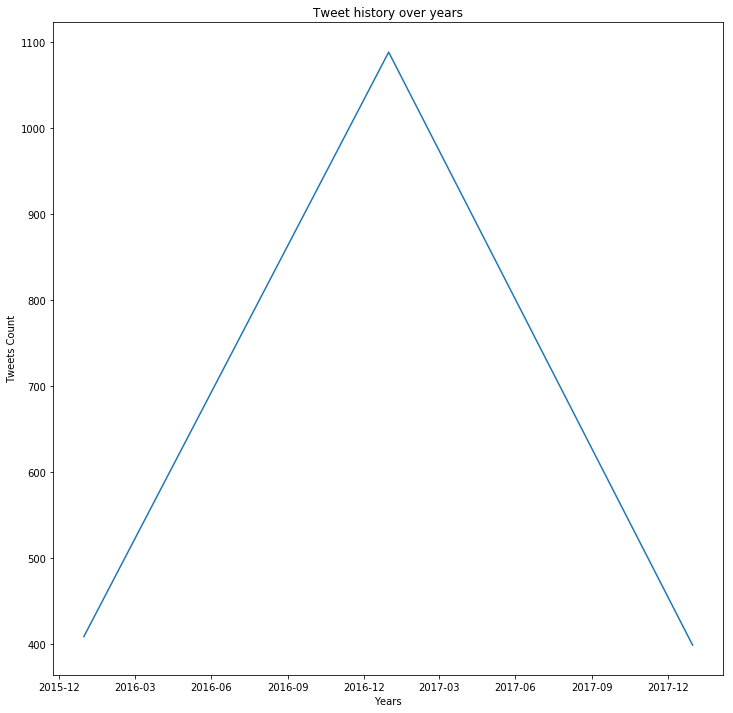

In [93]:
# Let's plot for Years

plt.figure(figsize=(12, 12));

plt.xlabel('Years')
plt.ylabel('Tweets Count')

plt.plot(tweets_history_years.timestamp, tweets_history_years.tweet_id);
plt.title('Tweet history over years');

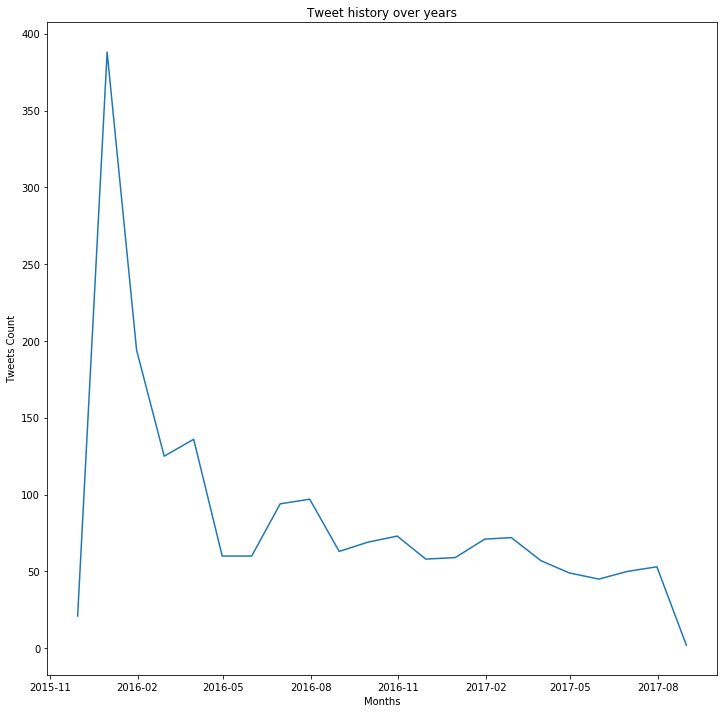

In [94]:
# Let's plot for Months

plt.figure(figsize=(12, 12));

plt.xlabel('Months')
plt.ylabel('Tweets Count')

plt.plot(tweets_history_months.timestamp, tweets_history_months.tweet_id);
plt.title('Tweet history over years');

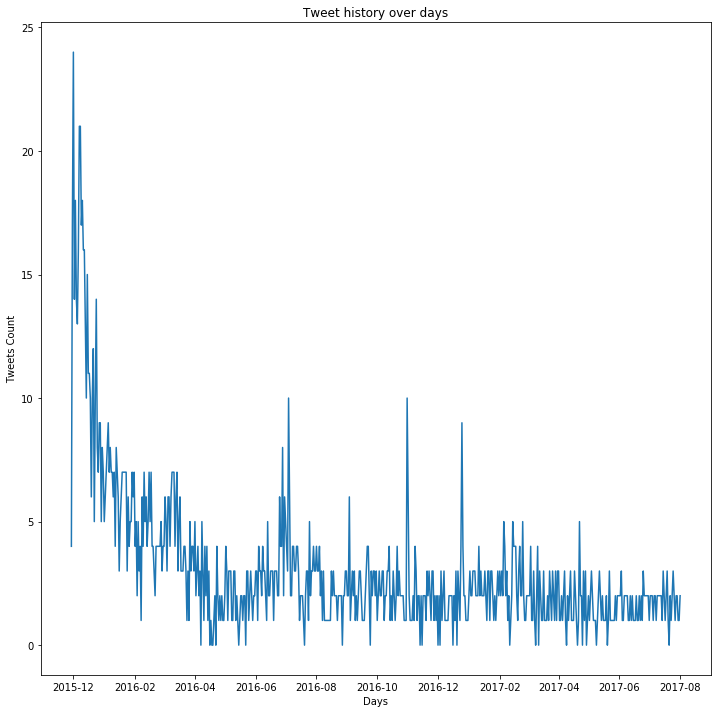

In [95]:
# Let's plot for Days

plt.figure(figsize=(12, 12));

plt.xlabel('Days')
plt.ylabel('Tweets Count')

plt.plot(tweets_history_days.timestamp, tweets_history_days.tweet_id);
plt.title('Tweet history over days');

Over time tweets decreased drasticaly with little skipes here and there

#### Visualizing the retweet counts, and favorite counts comparison over time.

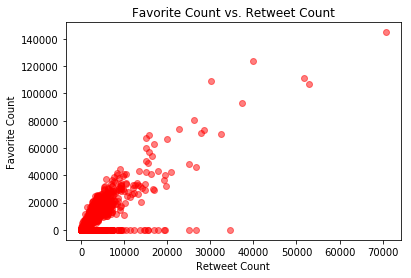

In [96]:
# Let's see a of retweets counts vs favorite counts

# sns.lmplot(x="retweet_count", 
#            y="favorite_count", 
#            data=df_merged,
#            size = 12,
#            aspect=1.3,
#            scatter_kws={'alpha':1/5});

plt.scatter(df_merged.retweet_count, df_merged.favorite_count, alpha=0.5, c = 'red')
plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');
plt.show()

In [97]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 23 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null datetime64[ns]
source                1896 non-null object
text                  1896 non-null object
expanded_urls         1841 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null bool
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null bool
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null bool
favorite_count        1896 non-null int64
retweet_count         1896 non-null int64
url                   1896 non-nu

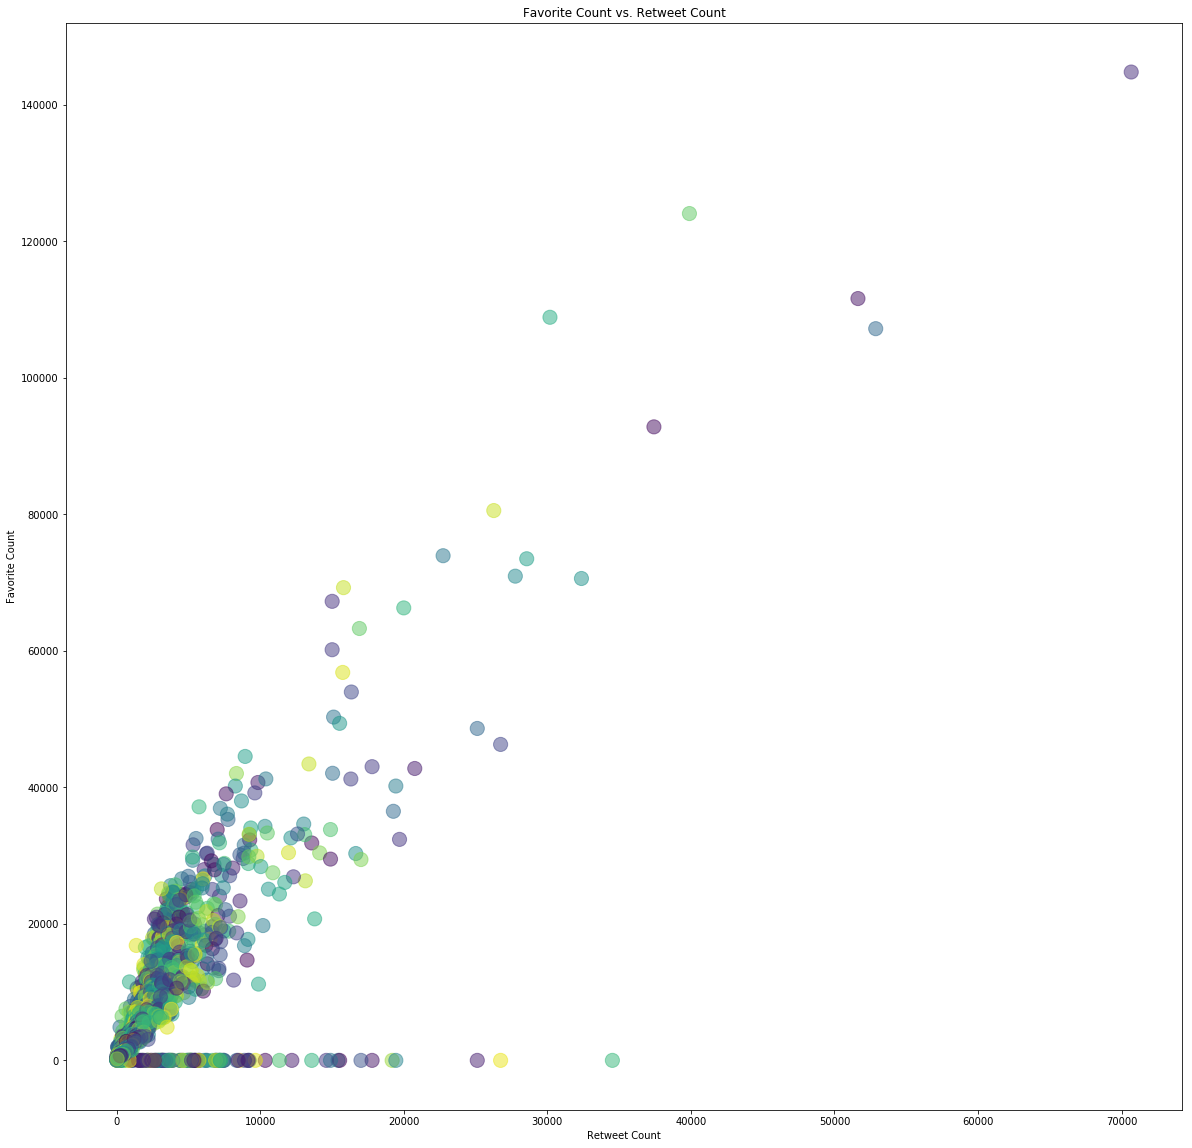

In [100]:
# Let's see a of retweets counts vs favorite counts
colors = np.random.rand(1896)

plt.scatter(df_merged.retweet_count, df_merged.favorite_count, alpha=0.5, c = colors, s = 200, )
plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');
plt.rcParams["figure.figsize"] = (20, 20)
plt.show()

We see a positive correlation here, Favorite counts are correlated with retweet counts

#### Visualizing the most popular dog names

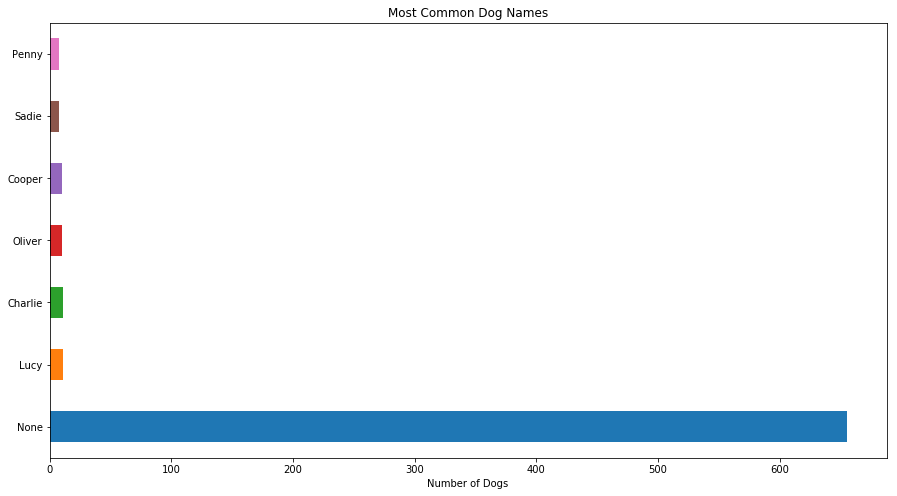

In [99]:
df_merged.name.value_counts()[0:7].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");